# Clean & Analyze Social Media Data

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
#Import required libaries 

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate random data as the social media data

categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

In [3]:
np.random.seed(456) # enables  us to generate same random numbers at each run

In [4]:
data = {'id': random.sample(range(101,1111), 500), 'Date': pd.date_range('2021-01-01', periods=500), 'Category': [np.random.choice(categories) for i in range(500)], 'Likes': np.random.randint(0, 10000, size=500)}

In [5]:
# Load the data into a Pandas DataFrame

df = pd.DataFrame(data)

## Step 2: Data Exploration and Cleaning

In this step, we will familiarise ourselves with the data. We will have an overview of the data by printing the first few rows to see how the data looks like. 
 
We will also check some informations about the data such as the various columns, their data type as well as the number of missing values. 

We wil then view a summary of the statistics of the data such as the number of observations. 
 
Lastly, we will print the number of observations for each category of the social media engagements.

In [6]:
# A glimpse at the data 

df.head()

,id,Date,Category,Likes
0,813,2021-01-01,Fitness,6518
1,259,2021-01-02,Culture,2046
2,981,2021-01-03,Fitness,8017
3,329,2021-01-04,Travel,383
4,256,2021-01-05,Fashion,3014


In [7]:
df['id'].count()

500

In [8]:
# View data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        500 non-null    int64         
 1   Date      500 non-null    datetime64[ns]
 2   Category  500 non-null    object        
 3   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 15.8+ KB


In [9]:
# View summary statistics of the data

df.describe()

,id,Likes
count,500.000000,500.000000
mean,605.990000,5089.812000
std,290.447561,2868.531636
min,101.000000,21.000000
25%,360.750000,2558.750000
50%,612.500000,5137.500000
75%,852.250000,7540.750000
max,1110.000000,9997.000000


### Data Quality Assessment

Here, we will assess th quality of the data to know if it is ready for the analyses. We will do this by inspecting for missing values, duplicated values, wrong data types, outliers and so on.

This task will enable us to determine how to clean the data and what sort of cleaning is needed.

In [10]:
# checking for missing values

df.isna().sum()

id          0
Date        0
Category    0
Likes       0
dtype: int64

In [11]:
# checking for duplicatd values

df.duplicated().sum()

0

In [12]:
df.dtypes

id                   int64
Date        datetime64[ns]
Category            object
Likes                int64
dtype: object

### Data Quality Assessment Report

This is the report of the above data quality assessment. The outcomes are outlined below:

1. It is clear that, there are no missing values in the data. All the data fields are filled with their corresponding values.
2. The data has no duplicate values. All observations are unique.
3. All the data columns have the right corresponding data types. There is no mismatch.

**Based on the data quality assessment report above, there is no room for data cleaning. Hence, we will move on to analyse and visualise our data.** 

## Step 3: Data Analysis and Visualisation

Here, we are going to perform statistical analysis the data to answer a few questions and also create visualisations to get a pictorial undrstanding of the data.

Questions to be answered include:

1. What are the top 5 most popular categories of reach.

2. Which category of post had the highest impression.

3. What is the total number of impressions. 
 
4. Which month and year had the most engagements.

5. What is the total number of engagements. 

6. Which category of the social media posts had the highest engagement in 2021 and 2022. 

**For the purpose of our analysis, we will first of all split the `Date` column into `Day`, `Month`, and `Year` and drop the `Date` column and move on with our analysis thereafter**

In [13]:
# Adding Year column to the dataframe

df['Year'] = df['Date'].dt.year

In [14]:
# Adding Month column to the dataframe

df['Month'] = df['Date'].dt.month

In [15]:
# Convert month number to month name

df['Month'] = pd.to_datetime(
    df['Month'], format='%m').dt.month_name()

In [16]:
# Adding Day column to the dataframe

df['Day'] = df['Date'].dt.day

In [17]:
df = df.drop(columns='Date')

In [18]:
# A glimpse at the data

df.head()

,id,Category,Likes,Year,Month,Day
0,813,Fitness,6518,2021,January,1
1,259,Culture,2046,2021,January,2
2,981,Fitness,8017,2021,January,3
3,329,Travel,383,2021,January,4
4,256,Fashion,3014,2021,January,5


### Statistical Analysis

#### 1. Overall Number of Reach by Category

In [19]:
# Printing total observations per category

cat_count = df['Category'].value_counts()

In [20]:
print(cat_count)

Culture    78
Family     71
Health     67
Fashion    66
Music      59
Fitness    57
Travel     56
Food       46
Name: Category, dtype: int64


**The above results clearly shows that `Culture` has the highest number of occurrence followed by `Family`, `Health`, `Fashion` and `Music`.**

#### 2. Overall Number of Impressions by Category

In [21]:
# Total number of engagements by categories

cat_likes = df.groupby('Category')['Likes'].sum().sort_values(ascending=False)

In [22]:
print(cat_likes)

Category
Family     410024
Culture    406486
Health     322948
Fashion    306140
Music      290646
Fitness    281499
Travel     274305
Food       252858
Name: Likes, dtype: int64


**The above results clearly shows that `Family` has the highest number of likes followed by `Culture`, `Health`, `Fashion` and `Music`.**

#### 3. Total Number of Impressions

In [23]:
overall_likes = df['Likes'].sum()
print(overall_likes)

2544906


**The total number of likes across all categories is `2544906`.**

#### 4. Overall Yearly Engagements

In [24]:
# Number of reach per year

views_per_yr = df.groupby('Year')['id'].count()
print(views_per_yr)

Year
2021    365
2022    135
Name: id, dtype: int64


**Total number of views in `2021` was `365` and that of `2022` was `135`.**

In [25]:
# Yearly impressions

likes_per_yr = df.groupby('Year')['Likes'].sum()
print(likes_per_yr)

Year
2021    1862195
2022     682711
Name: Likes, dtype: int64


**Total number of likes in `2021` was `1862195` and that of `2022` was `682711`.**

In [26]:
# Monthly impressions

likes_per_mnth = df.groupby('Month')['Likes'].sum().sort_values(ascending=False)
print(likes_per_mnth)

Month
March        324994
January      306229
February     292398
April        287601
May          222884
October      180608
July         170832
August       167778
December     159310
November     147070
June         143352
September    141850
Name: Likes, dtype: int64


**The month with the highest number of engagements is `March` and the month with the least number of engagements is `September`.**

#### 5. Total Engagements

In [27]:
total_views = df['id'].count()
print(total_views)

500


#### 6. Category of post with Highest Engagement

In [28]:
# Total views of each category in a year

cat_count_yr = df.groupby(['Year','Category'])['id'].count().sort_values(ascending=False)
print(cat_count_yr)

Year  Category
2021  Culture     56
      Family      50
      Music       48
      Fitness     46
      Health      43
      Fashion     43
      Travel      42
      Food        37
2022  Health      24
      Fashion     23
      Culture     22
      Family      21
      Travel      14
      Music       11
      Fitness     11
      Food         9
Name: id, dtype: int64


**`Culture` had the most views both in `2021` and `Health` had the most views in `2022`.**

In [39]:
# Total likes of each month in a year

monthly_likes_yr = df.groupby(['Year','Month'])['Likes'].sum().sort_values(ascending=False)
print(monthly_likes_yr)

Year  Month    
2021  October      180608
      July         170832
      August       167778
      March        165641
2022  March        159353
2021  December     159310
2022  January      156314
2021  May          155091
2022  April        154306
2021  January      149915
      February     147453
      November     147070
2022  February     144945
2021  June         143352
      September    141850
      April        133295
2022  May           67793
Name: Likes, dtype: int64


In [29]:
# Total likes of each category in a year

cat_likes_yr = df.groupby(['Year','Category'])['Likes'].sum().sort_values(ascending=False)
print(cat_likes_yr)

Year  Category
2021  Culture     290534
      Family      272242
      Fitness     248071
      Music       226035
      Health      216155
      Travel      215599
      Food        200261
      Fashion     193298
2022  Family      137782
      Culture     115952
      Fashion     112842
      Health      106793
      Music        64611
      Travel       58706
      Food         52597
      Fitness      33428
Name: Likes, dtype: int64


**`Culture` had the most likes in `2021` and `Family` had the most likes in `2022`.**

### Data Visualisation

#### 1. Overall Number of Reach by Category

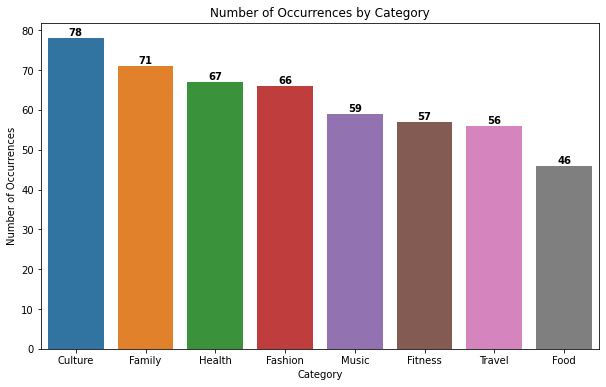

In [30]:
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=cat_count.index, y=cat_count.values)

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences by Category')

# Adding data values on top of the bars
for i, value in enumerate(cat_count.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')

# Display the plot
plt.show()


#### 2. Overall Number of Impressions by Category

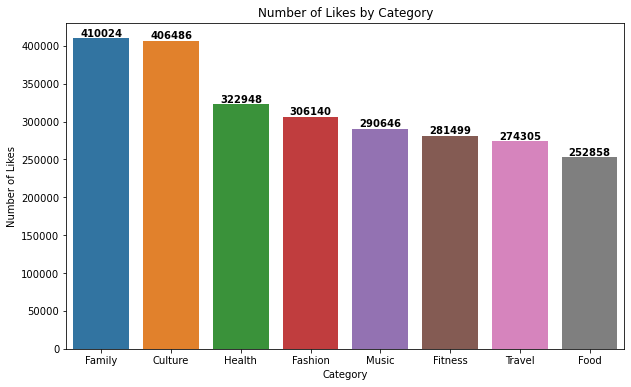

In [31]:
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=cat_likes.index, y=cat_likes.values)

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Number of Likes')
plt.title('Number of Likes by Category')

# Adding data values on top of the bars
for i, value in enumerate(cat_likes.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')

# Display the plot
plt.show()


#### 3. Overall Yearly Engagements

##### 3a. Total Views by Year

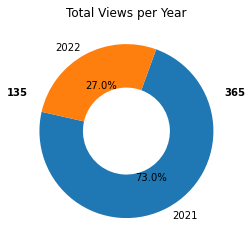

In [32]:
# Grouping by 'year' and counting the engagements
grouped_data = df.groupby('Year')['Category'].count().reset_index()

# Creating a pie chart
fig, ax = plt.subplots()
ax.pie(grouped_data['Category'], labels=grouped_data['Year'], autopct='%1.1f%%', startangle=70, counterclock=False, wedgeprops=dict(width=0.5))

# Adding value labels
for i, value in enumerate(grouped_data['Category']):
    plt.text(-2.5 * (i-0.5), 0.5, f'{value}', ha='center', va='top', fontweight='bold')

# Adding title
plt.title('Total Views per Year')

# Display the plot
plt.show()


##### 3b. Total Likes by Year

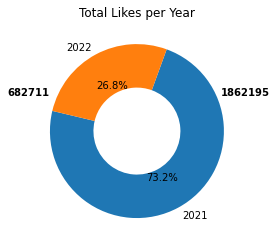

In [33]:
# Grouping by 'year' and summing the engagements
grouped_data = df.groupby('Year')['Likes'].sum().reset_index()

# Creating a pie chart
fig, ax = plt.subplots()
ax.pie(grouped_data['Likes'], labels=grouped_data['Year'], autopct='%1.1f%%', startangle=70, counterclock=False, wedgeprops=dict(width=0.5))

# Adding value labels
for i, value in enumerate(grouped_data['Likes']):
    plt.text(-2.5 * (i-0.5), 0.5, f'{value}', ha='center', va='top', fontweight='bold')

# Adding title
plt.title('Total Likes per Year')

# Display the plot
plt.show()


##### 3c. Total Views of Categories per Year

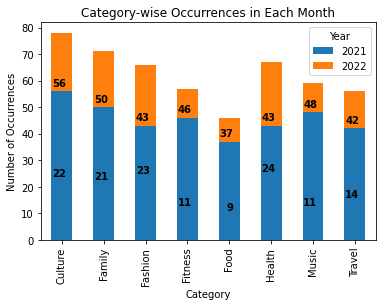

In [34]:
# Grouping by 'category' and 'month' and getting the count
grouped_data = df.groupby(['Category', 'Year']).size().reset_index(name='count')

# Pivot the DataFrame to have 'month' as columns
pivot_data = grouped_data.pivot(index='Category', columns='Year', values='count').fillna(0)

# Plotting using Matplotlib
pivot_data.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Number of Occurrences')
plt.title('Category-wise Occurrences in Each Month')

# Adding data values on top of the bars
for i, category in enumerate(pivot_data.index):
    for j, month in enumerate(pivot_data.columns):
        plt.text((i+0.1), pivot_data.loc[category, month] + 5, str(int(pivot_data.loc[category, month])), ha='right', va='top', fontweight='bold')

# Display the plot
plt.show()


##### 3d. Total Likes of Categories per Year

#### 4. Overall Monthly Engagements

##### 4a. Total Views of categories by Month

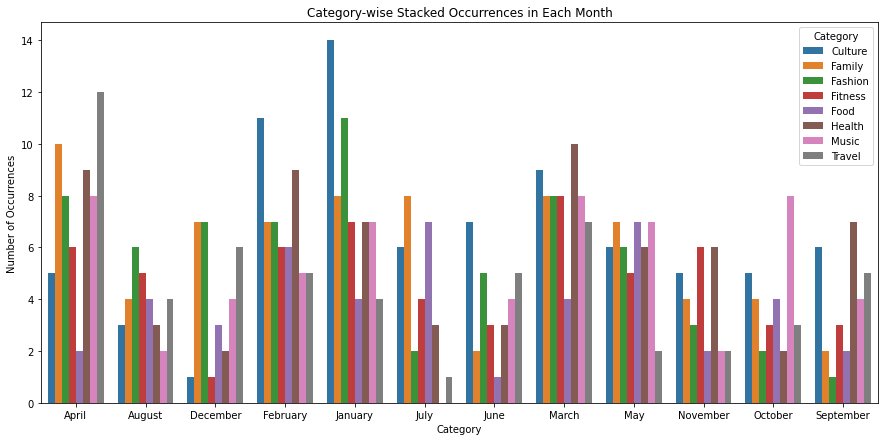

In [35]:
# Grouping by 'category' and 'month' and getting the number of occurrences
grouped_data = df.groupby(['Category', 'Month']).size().reset_index(name='count')

# Plotting using Seaborn
plt.figure(figsize=(15, 7))
sns.barplot(x = 'Month', y = 'count', hue='Category', data=grouped_data, ci=None)

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Number of Occurrences')
plt.title('Category-wise Stacked Occurrences in Each Month')

# Inverting the y-axis
#plt.gca().invert_yaxis()

# Display the plot
plt.show()


##### 4b. Total Likes of categories by Month

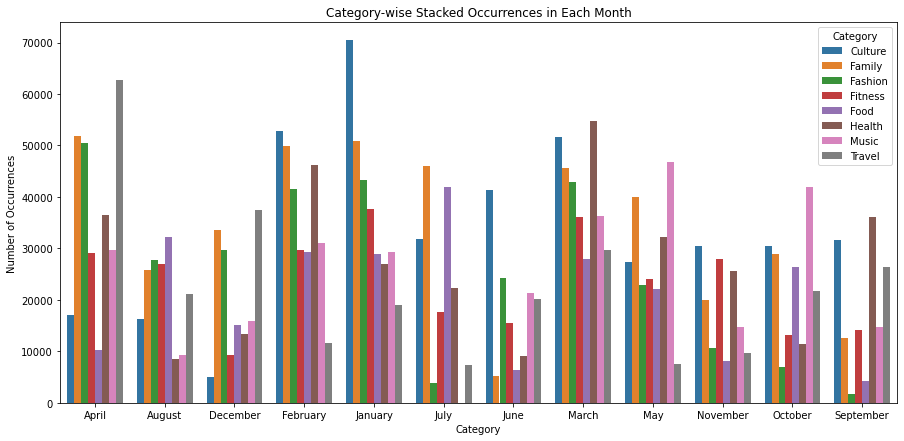

In [36]:
# Grouping by 'category' and 'month' and getting the number of occurrences
grouped_data = df.groupby(['Category', 'Month'])['Likes'].sum().reset_index()

# Plotting using Seaborn
plt.figure(figsize=(15, 7))
sns.barplot(x = 'Month', y = 'Likes', hue='Category', data=grouped_data, ci=None)

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Number of Occurrences')
plt.title('Category-wise Stacked Occurrences in Each Month')

# Inverting the y-axis
#plt.gca().invert_yaxis()

# Display the plot
plt.show()


## Step 4: Conclusions and Recommendations

In th next few lines, I will expound on the data analysis processes above and the respective findings.

First, the data I used for this project is a randomly generated data. I then performed an exploratory data analysis that helped me to understand the various data structures and enabled me to perform the nccessary cleaning. I went ahead to perform some statistics on the data to understand the story behind the data and plotted charts and graphs to visualise the data.

Below are insights generated from the data and some recommended actions:

- The overall total number of views across all categories of posts is `500` of which `135` was in 2022 and `365` was in 2021.
- In 2021, there was `1862195` total likes across all categories of posts and in 2022, there was `682711` total likes.
- In general, `Culture` category had the most views but `Family` category had the most likes. This implies that, most viewers showed much interest in family contents. Hence more of such contents should be promoted to increase reach to a spectrum of users.
- The top 5 most popular content categories are `Culture`, `Family`, `Health`, `Fashion` and `Music`. Stakeholders should invest more in these content categories.
- `Culture` and `Family` categories had the hishest likes in 2021 and 2022 interchangeably so these two content categories should be the point of focus of content creators.
- In 2021, `October` had the highest likes, in 2022, `March` had the highest likes and overall, `March` had the highest number of likes. This means that content viewers are more involved and pay attention to contents in the month `March` followed by `October`. Hence, content creators should be more active in these months.


#  